In [2]:
from PIL import Image
import cv2 as cv
import math
import numpy as np
from matplotlib import pyplot as plt
import pywt

In [2]:
# A function for Converting to gray

def conv_to_gray (original_img):

    height, width, channel = original_img.shape

    gray_img = np.empty([height, width], dtype=float)

    for i in range(0, height):
        for j in range(0, width):
            rgb_sum = 0
            for w in range(0, channel):
                rgb_sum += original_img[i, j, w]
            gray_img[i, j] = (rgb_sum / 3)

    gray_img = gray_img.astype(int)
    return gray_img

In [3]:
# Reading the images
cameraman = cv.imread("cameraman.tif")
lena = cv.imread("lena_gray_512.tif")
mandril = cv.imread("mandril_gray.tif")

# Converting color images to gray images
cameraman_gray = conv_to_gray(cameraman)
lena_gray = conv_to_gray(lena)
mandril_gray = conv_to_gray(mandril)

In [ ]:
########################################## Q1 ############################################

(-0.5, 511.5, 511.5, -0.5)

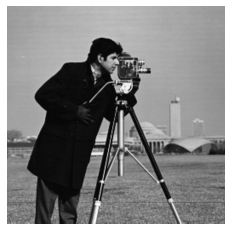

In [4]:
plt.figure()
plt.imshow(cameraman_gray, cmap="gray")
plt.axis("off")

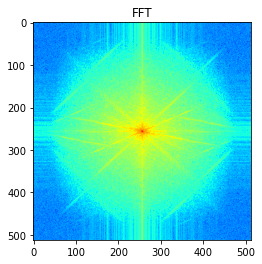

In [40]:
# shifted fft of the image
cameraman_fft = np.fft.fft2(cameraman_gray)
cameraman_fftShifted = np.fft.fftshift(cameraman_fft)

plt.figure()
plt.imshow(np.log(np.abs(cameraman_fftShifted)), cmap="jet")
plt.title("FFT")
plt.show()

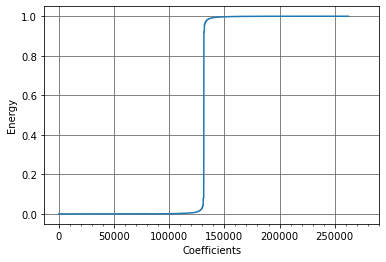

In [6]:
# calculating the energy of coefficients
cameraman_fftEnergy =  np.power(cameraman_fftShifted, 2)

# sorting the coefficients in a 1d array raster vise
cameraman_fftSort = np.abs(cameraman_fftEnergy.reshape(-1))

# calculating the percentage of each coefficient
cameraman_coefEnergies = cameraman_fftSort / np.sum(cameraman_fftSort)

# grapghing the presence of coefficients in the image
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

plt.plot(np.cumsum(cameraman_coefEnergies))

major_ticks = np.arange(0, 300000, 50000)
minor_ticks = np.arange(0, 300000, 10000)

ax.set_xticks(major_ticks)
ax.set_xticks(minor_ticks, minor=True)

plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.xlabel('Coefficients')
plt.title("FFT")
plt.ylabel('Energy')
plt.show()

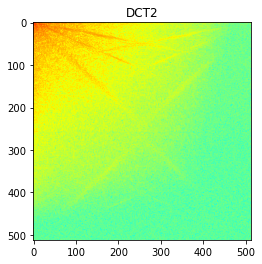

In [7]:
cameraman_gray_f = np.array(cameraman_gray, dtype=np.float32)
cameraman_dct = cv.dct(cameraman_gray_f)

plt.imshow(np.log(np.abs(cameraman_dct)), cmap="jet")
plt.title("DCT2")
plt.show()

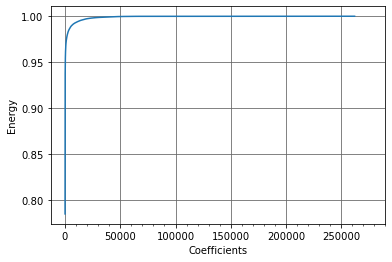

In [13]:
# calculating the energy of coefficients
cameraman_dctEnergy =  np.power(cameraman_dct, 2)

# sorting the coefficients in a 1d array zig-zag vise
matrix = cameraman_dctEnergy

rows = matrix.shape[0]
columns = matrix.shape[1]
    
solution=[[] for i in range(rows+columns - 1)]
  
for i in range(rows):
    for j in range(columns):
        
        sum = i + j
        if(sum % 2 == 0):
            #add at beginning
            solution[sum].insert(0,matrix[i][j])
        
        else:
            #add at end of the list
            solution[sum].append(matrix[i][j])
                        
cameraman_dctSort = np.concatenate(solution, axis=0)

# calculating the percentage of each coefficient
cameraman_coefEnergies = cameraman_dctSort / np.sum(cameraman_dctSort)

# grapghing the presence of coefficients in the image
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

plt.plot(np.cumsum(cameraman_coefEnergies))

major_ticks = np.arange(0, 300000, 50000)
minor_ticks = np.arange(0, 300000, 10000)

ax.set_xticks(major_ticks)
ax.set_xticks(minor_ticks, minor=True)

plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.title("DCT")
plt.xlabel('Coefficients')
plt.ylabel('Energy')
plt.show()

In [23]:
np.concatenate(solution, axis=0)

array([1, 2, 4, 7, 5, 3, 6, 8, 9])

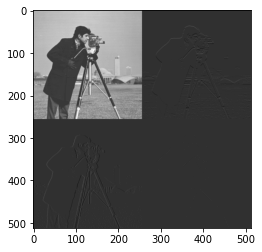

In [16]:
coeffs = pywt.dwt2(cameraman_gray, 'haar')
cA, (cH, cV, cD) = coeffs


# concatenation of mask and compressedimage
cameraman_haar = np.zeros((cameraman_gray.shape),dtype=np.float32)
row1 = np.concatenate((cA, cH), axis=1)
row2 = np.concatenate((cV, cD), axis=1)
cameraman_haar = np.concatenate((row1, row2), axis=0)

plt.imshow(cameraman_haar,'gray')
plt.title("HAAR")
plt.show()

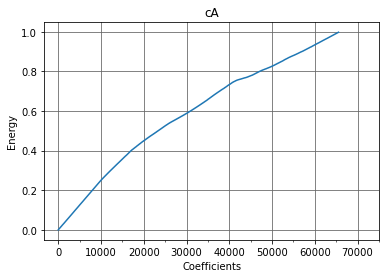

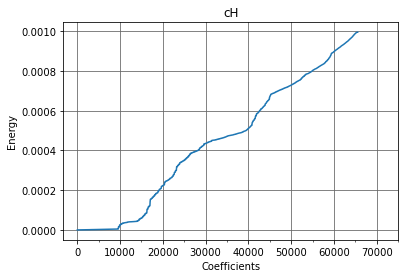

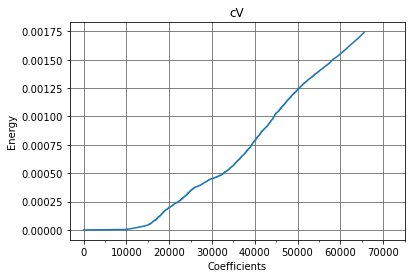

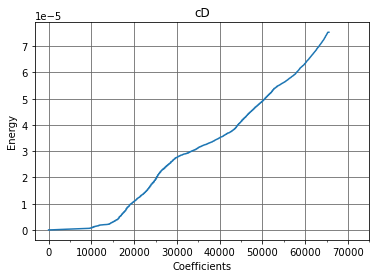

In [39]:
# calculating the energy of coefficients
cameraman_haarEnergy =  np.power(cameraman_haar, 2)

# calculating the percentage of each coefficient
cameraman_cA_energy = np.power(cA, 2) / np.sum(cameraman_haarEnergy)
cameraman_cH_energy = np.power(cH, 2) / np.sum(cameraman_haarEnergy)
cameraman_cV_energy = np.power(cV, 2) / np.sum(cameraman_haarEnergy)
cameraman_cD_energy = np.power(cD, 2) / np.sum(cameraman_haarEnergy)

# graph for cA
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

plt.plot(np.cumsum(cameraman_cA_energy))

major_ticks = np.arange(0, 80000, 10000)
minor_ticks = np.arange(0, 80000, 5000)

ax.set_xticks(major_ticks)
ax.set_xticks(minor_ticks, minor=True)

plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.title("cA")
plt.xlabel('Coefficients')
plt.ylabel('Energy')

# graph for cH
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

plt.plot(np.cumsum(cameraman_cH_energy))

major_ticks = np.arange(0, 80000, 10000)
minor_ticks = np.arange(0, 80000, 5000)

ax.set_xticks(major_ticks)
ax.set_xticks(minor_ticks, minor=True)

plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.title("cH")
plt.xlabel('Coefficients')
plt.ylabel('Energy')

# graph for cV
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

plt.plot(np.cumsum(cameraman_cV_energy))

major_ticks = np.arange(0, 80000, 10000)
minor_ticks = np.arange(0, 80000, 5000)

ax.set_xticks(major_ticks)
ax.set_xticks(minor_ticks, minor=True)

plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.title("cV")
plt.xlabel('Coefficients')
plt.ylabel('Energy')

# graph for cD
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

plt.plot(np.cumsum(cameraman_cD_energy))

major_ticks = np.arange(0, 80000, 10000)
minor_ticks = np.arange(0, 80000, 5000)

ax.set_xticks(major_ticks)
ax.set_xticks(minor_ticks, minor=True)

plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.title("cD")
plt.xlabel('Coefficients')
plt.ylabel('Energy')

plt.show()

In [8]:
########################################## Q2 ############################################

In [281]:
def PSNR(org_image, rec_image):
    
#     org_image = org_image.astype(int)
#     rec_image = rec_image.astype(int)
    
    MSE = np.sum(np.power((org_image - rec_image), 2)) / (org_image.shape[0] * org_image.shape[1])
    psnr = 10 * np.log2(np.power(255, 2) / MSE)
    
    return psnr

In [282]:
def fftLP_filter(image, filter_size):
    
    plt.imshow(image,cmap = "gray")
    plt.title("Original")
    plt.show()
    
    # fft transform & shifting
    image_fft = np.fft.fft2(image)
    image_fftShifted = np.fft.fftshift(image_fft)
    
    # creating the mask
    mask = np.zeros(image_fft.shape)
    
    # adjusting the filter size and place it in the middle of the mask
    mask_width = int(filter_size / 2)
    h = int(image_fft.shape[0] / 2)
    w = int(image_fft.shape[1] / 2)
    mask[h - mask_width : h + mask_width, w - mask_width : w + mask_width] = 1
    
    plt.imshow(mask,cmap="gray")
    plt.title("mask")
    plt.show()

    # filtering the image in the frequency domain
    masked_image_fft  = np.fft.fftshift(mask) * image_fft
    
    # reconstructing the filtered image
    image_reconstructed = np.real(np.fft.ifft2(masked_image_fft))
    
    plt.imshow(image_reconstructed ,cmap="gray")
    plt.title("Reconstructed")
    plt.show()
    
    # calculating the energy of coefficients before masking
    image_fftEnergy =  np.power(np.real(image_fftShifted), 2)
    print("image_fft Coefficients Energy:" ,np.sum(image_fftEnergy))
    
    # calculating the energy of coefficients after masking
    masked_image_fftEnergy =  np.power(np.real(masked_image_fft), 2)
    print("masked_image_fft Coefficients Energy:" ,np.sum(masked_image_fftEnergy))
    
    # energy ratio (before masking and after masking)
    print("Energy Ratio:" ,np.sum(masked_image_fftEnergy) / np.sum(image_fftEnergy))

    
    print("PSNR:", PSNR(image, image_reconstructed))

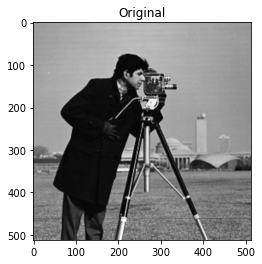

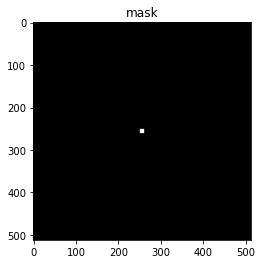

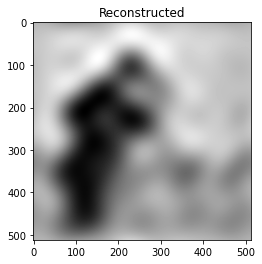

image_fft Coefficients Energy: 1055757347323904.1
masked_image_fft Coefficients Energy: 1020206640768375.2
Energy Ratio: 0.9663268206035776
PSNR: 58.52645066622789


In [283]:
fftLP_filter(cameraman_gray, 10)

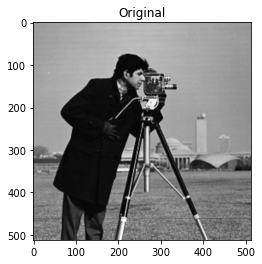

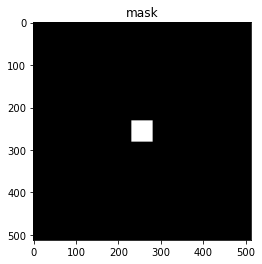

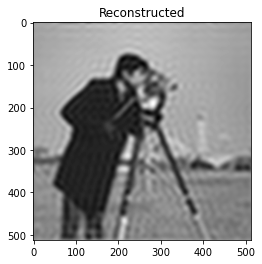

image_fft Coefficients Energy: 1055757347323904.1
masked_image_fft Coefficients Energy: 1043381051357598.1
Energy Ratio: 0.9882773290683915
PSNR: 75.19712854046931


In [284]:
fftLP_filter(cameraman_gray, 50)

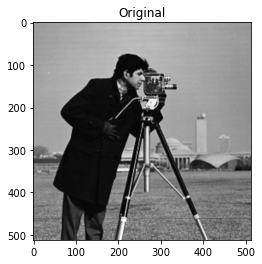

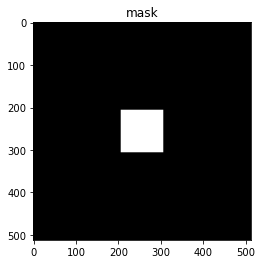

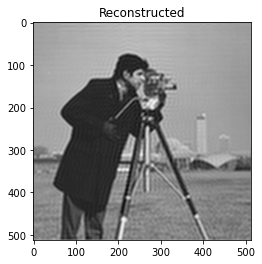

image_fft Coefficients Energy: 1055757347323904.1
masked_image_fft Coefficients Energy: 1050799908725952.8
Energy Ratio: 0.9953043768906583
PSNR: 88.09438237330994


In [285]:
fftLP_filter(cameraman_gray, 100)

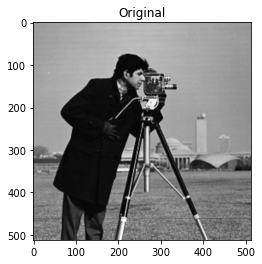

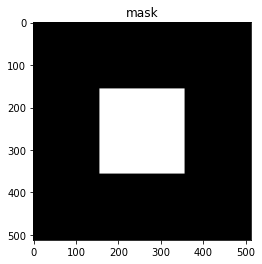

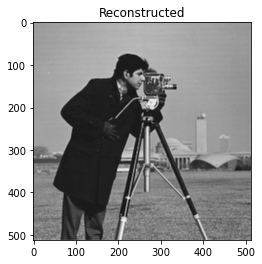

image_fft Coefficients Energy: 1055757347323904.1
masked_image_fft Coefficients Energy: 1054984952196214.4
Energy Ratio: 0.9992683971088171
PSNR: 115.72569753638943


In [286]:
fftLP_filter(cameraman_gray, 200)

In [287]:
def dctLP_filter(image, filter_size):
    
    plt.imshow(image, cmap="gray")
    plt.title("Original image")
    plt.show()
    
    # dct transform
    image_f = np.array(image, dtype=np.float32)
    image_dct = cv.dct(image_f)
    
    # creating a mask
    mask = np.zeros(image.shape,dtype = np.float32)
    
    for i in range(0, int(image.shape[0] / filter_size)):
        for j in range(0, int(image.shape[1] / filter_size)-i):
            
            mask[i,j] = 1
            
    # filtering the image in DCT domain        
    masked_image_dct = image_dct * mask
    
    plt.imshow(np.log(1 + np.abs(masked_image_dct)),cmap="gray")
    plt.show()
    
    # reconstructing the image
    image_reconstructed = cv.idct(masked_image_dct)
    
    plt.imshow(image_reconstructed, cmap="gray")
    plt.title("Rec")
    plt.show()
    
    # showing the diffrence
    Diff = np.log(1 + np.abs(image - image_reconstructed))
        
    plt.imshow(Diff, cmap="gray")
    plt.title("difference")
    plt.show()
    
    # calculating the energy of coefficients before masking
    image_dctEnergy =  np.power(np.real(image_dct), 2)
    print("image_dct Coefficients Energy:" ,np.sum(image_dctEnergy))
    
    # calculating the energy of coefficients after masking
    masked_image_dctEnergy =  np.power(np.real(masked_image_dct), 2)
    print("masked_image_dct Coefficients Energy:" ,np.sum(masked_image_dctEnergy))
    
    # energy ratio (before masking and after masking)
    print("Energy Ratio:" ,np.sum(masked_image_dctEnergy) / np.sum(image_dctEnergy))
    
    # calculating PSNR
    print("PSNR:", PSNR(image, image_reconstructed))

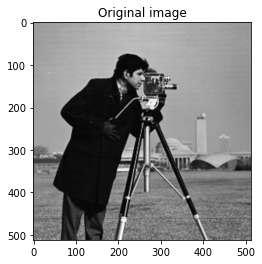

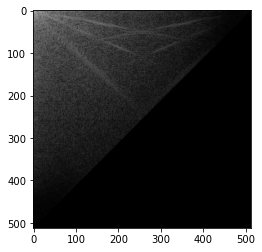

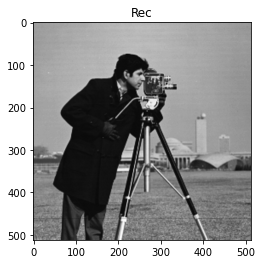

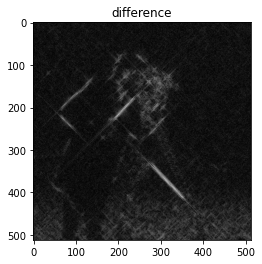

image_dct Coefficients Energy: 4677097000.0
masked_image_dct Coefficients Energy: 4677029400.0
Energy Ratio: 0.9999856
PSNR: 179.50440637837912


In [288]:
dctLP_filter(cameraman_gray, 1)

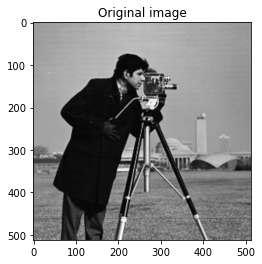

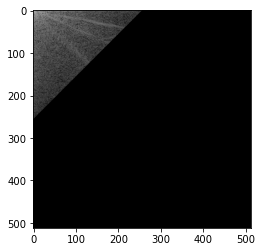

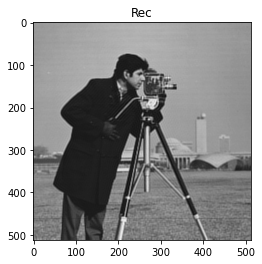

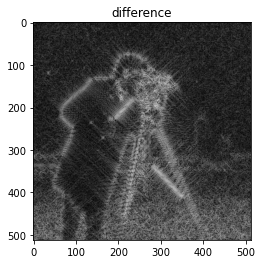

image_dct Coefficients Energy: 4677097000.0
masked_image_dct Coefficients Energy: 4670593500.0
Energy Ratio: 0.99860954
PSNR: 113.55750713383215


In [289]:
dctLP_filter(cameraman_gray, 2)

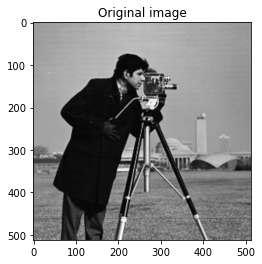

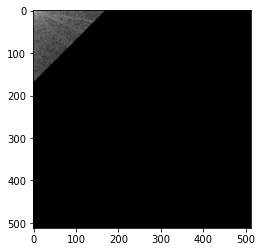

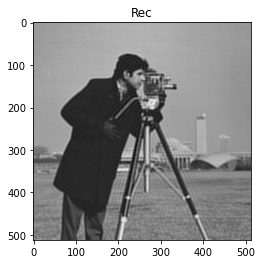

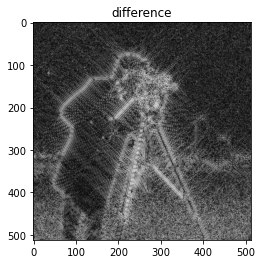

image_dct Coefficients Energy: 4677097000.0
masked_image_dct Coefficients Energy: 4655167500.0
Energy Ratio: 0.9953113
PSNR: 96.02320803545632


In [290]:
dctLP_filter(cameraman_gray, 3)

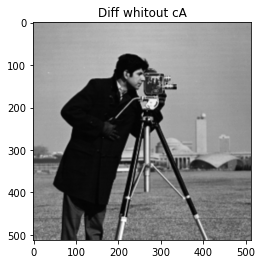

31015306.0
PSNR: 18.698045407610984


In [291]:
coeffs = pywt.dwt2(cameraman_gray, 'haar')
cA, (cH, cV, cD) = coeffs


# concatenation of mask and compressedimage
cameraman_haar = np.zeros((cameraman_gray.shape),dtype=np.float32)
row1 = np.concatenate((cA, cH), axis=1)
row2 = np.concatenate((cV, cD), axis=1)
cameraman_haar = np.concatenate((row1, row2), axis=0)

cameraman_reconstructed = pywt.idwt2((np.zeros((cA.shape),dtype=np.float64), (cH, cV, cD)), 'haar')
plt.imshow(cameraman_gray - cameraman_reconstructed,'gray')
plt.title('Diff whitout cA')
plt.show()
print(np.sum(np.abs(cameraman_gray - cameraman_reconstructed)))

print("PSNR:", PSNR(cameraman_gray, cameraman_reconstructed))

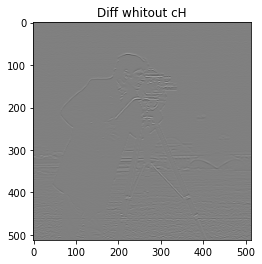

520980.00000000076
PSNR: 118.3824510352514


In [292]:
cameraman_reconstructed = pywt.idwt2((cA, (np.zeros((cH.shape),dtype=np.float64), cV, cD)), 'haar')
plt.imshow(cameraman_gray - cameraman_reconstructed,'gray')
plt.title('Diff whitout cH')
plt.show()
print(np.sum(np.abs(cameraman_gray - cameraman_reconstructed)))

print("PSNR:", PSNR(cameraman_gray, cameraman_reconstructed))

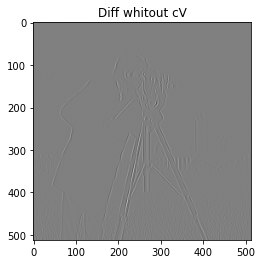

602712.0000000008
PSNR: 110.30412859980498


In [293]:
cameraman_reconstructed = pywt.idwt2((cA, (cH, np.zeros((cV.shape),dtype=np.float64), cD)), 'haar')
plt.imshow(cameraman_gray - cameraman_reconstructed,'gray')
plt.title('Diff whitout cV')
plt.show()
print(np.sum(np.abs(cameraman_gray - cameraman_reconstructed)))

print("PSNR:", PSNR(cameraman_gray, cameraman_reconstructed))

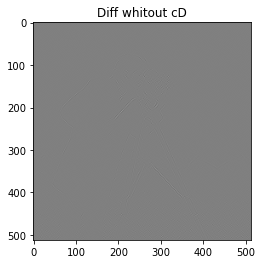

142408.00000000236
PSNR: 155.62706308555357


In [294]:
cameraman_reconstructed = pywt.idwt2((cA, (cH,cV , np.zeros((cD.shape),dtype=np.float64))), 'haar')
plt.imshow(cameraman_gray - cameraman_reconstructed,'gray')
plt.title('Diff whitout cD')
plt.show()
print(np.sum(np.abs(cameraman_gray - cameraman_reconstructed)))

print("PSNR:", PSNR(cameraman_gray, cameraman_reconstructed))

In [ ]:
########################################## Q3 ############################################

In [303]:
def segmented_process(M, blk_size=(16,16), overlap=(0,0)):
    rows = []
    for i in range(0, M.shape[0], blk_size[0]):
        cols = []
        for j in range(0, M.shape[1], blk_size[1]):
            cols.append(cv.dct(M[i:i + blk_size[0], j:j + blk_size[1]]))
        rows.append(np.concatenate(cols, axis=1))
    return np.concatenate(rows, axis=0)

In [319]:
def zigzag_scan(matrix):

    rows = matrix.shape[0]
    columns = matrix.shape[1]

    solution=[[] for i in range(rows+columns - 1)]

    for i in range(rows):
        for j in range(columns):

            sum = i + j
            if(sum % 2 == 0):
                #add at beginning
                solution[sum].insert(0,matrix[i][j])

            else:
                #add at end of the list
                solution[sum].append(matrix[i][j])

    return np.concatenate(solution, axis=0)

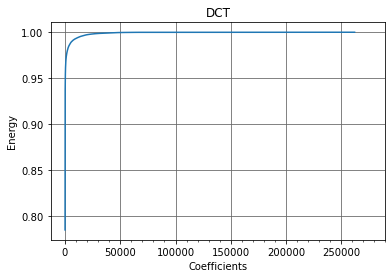

In [320]:
# calculating the energy of coefficients
cameraman_dctEnergy =  np.power(cameraman_dct, 2)

# sorting the coefficients in a 1d array zig-zag vise
cameraman_dctSort = zigzag_scan(cameraman_dctEnergy)

# calculating the percentage of each coefficient
cameraman_coefEnergies = cameraman_dctSort / np.sum(cameraman_dctSort)

# grapghing the presence of coefficients in the image
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

plt.plot(np.cumsum(cameraman_coefEnergies))

major_ticks = np.arange(0, 300000, 50000)
minor_ticks = np.arange(0, 300000, 10000)

ax.set_xticks(major_ticks)
ax.set_xticks(minor_ticks, minor=True)

plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.title("DCT")
plt.xlabel('Coefficients')
plt.ylabel('Energy')
plt.show()

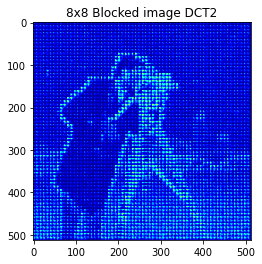

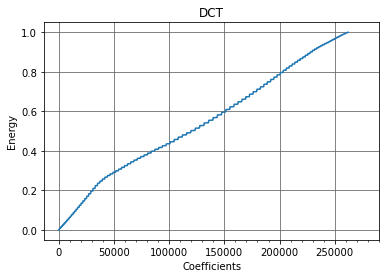

In [321]:
cameraman_segmented8 = segmented_process(cameraman_gray_f, blk_size=(8, 8), overlap=(0, 0))

plt.imshow(np.log(1 + np.abs(cameraman_segmented8)), cmap="jet")
plt.title("8x8 Blocked image DCT2")
plt.show()

# calculating the energy of coefficients
cameraman_dctEnergy =  np.power(cameraman_segmented8, 2)

# sorting the coefficients in a 1d array zig-zag vise
cameraman_dctSort = zigzag_scan(cameraman_dctEnergy)

# calculating the percentage of each coefficient
cameraman_coefEnergies = cameraman_dctSort / np.sum(cameraman_dctSort)

# grapghing the presence of coefficients in the image
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

plt.plot(np.cumsum(cameraman_coefEnergies))

major_ticks = np.arange(0, 300000, 50000)
minor_ticks = np.arange(0, 300000, 10000)

ax.set_xticks(major_ticks)
ax.set_xticks(minor_ticks, minor=True)

plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.title("DCT")
plt.xlabel('Coefficients')
plt.ylabel('Energy')
plt.show()

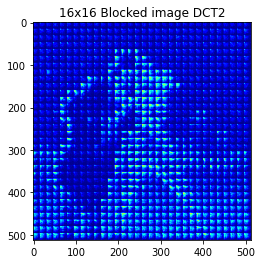

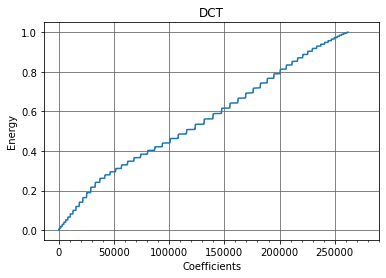

In [322]:
cameraman_segmented16 = segmented_process(cameraman_gray_f, blk_size=(16, 16), overlap=(0, 0))

plt.imshow(np.log(1 + np.abs(cameraman_segmented16)), cmap="jet")
plt.title("16x16 Blocked image DCT2")
plt.show()

# calculating the energy of coefficients
cameraman_dctEnergy =  np.power(cameraman_segmented16, 2)

# sorting the coefficients in a 1d array zig-zag vise
cameraman_dctSort = zigzag_scan(cameraman_dctEnergy)

# calculating the percentage of each coefficient
cameraman_coefEnergies = cameraman_dctSort / np.sum(cameraman_dctSort)

# grapghing the presence of coefficients in the image
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

plt.plot(np.cumsum(cameraman_coefEnergies))

major_ticks = np.arange(0, 300000, 50000)
minor_ticks = np.arange(0, 300000, 10000)

ax.set_xticks(major_ticks)
ax.set_xticks(minor_ticks, minor=True)

plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.title("DCT")
plt.xlabel('Coefficients')
plt.ylabel('Energy')
plt.show()

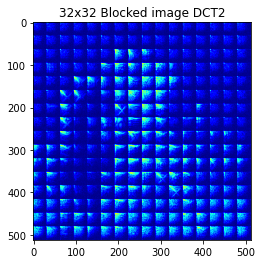

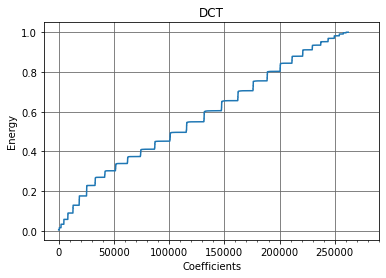

In [323]:
cameraman_segmented32 = segmented_process(cameraman_gray_f, blk_size=(32, 32), overlap=(0, 0))

plt.imshow(np.log(1 + np.abs(cameraman_segmented32)), cmap="jet")
plt.title("32x32 Blocked image DCT2")
plt.show()

# calculating the energy of coefficients
cameraman_dctEnergy =  np.power(cameraman_segmented32, 2)

# sorting the coefficients in a 1d array zig-zag vise
cameraman_dctSort = zigzag_scan(cameraman_dctEnergy)

# calculating the percentage of each coefficient
cameraman_coefEnergies = cameraman_dctSort / np.sum(cameraman_dctSort)

# grapghing the presence of coefficients in the image
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

plt.plot(np.cumsum(cameraman_coefEnergies))

major_ticks = np.arange(0, 300000, 50000)
minor_ticks = np.arange(0, 300000, 10000)

ax.set_xticks(major_ticks)
ax.set_xticks(minor_ticks, minor=True)

plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.title("DCT")
plt.xlabel('Coefficients')
plt.ylabel('Energy')
plt.show()

In [7]:
########################################## Q4 ############################################

In [3]:
from scipy.fft import fft, dct , ifft, idct

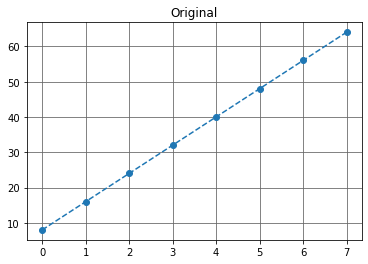

In [4]:
the_array = [8, 16, 24, 32, 40, 48, 56, 64]

plt.plot(the_array, marker='o', linestyle="--")
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.title("Original")
plt.show()

In [5]:
# fft & dct transform
the_array_fft = fft(the_array)
the_array_dct = dct(the_array)

print(the_array_fft)
print(the_array_dct)

# filtering
for i in range(4, int(len(the_array)), 1):
    the_array_dct[i] = 0
    the_array_fft[i] = 0
    
# ifft & idct transorm
the_array_ifft = ifft(the_array_fft).real
the_array_idct = idct(the_array_dct)

[288. -0.j       -32.+77.254834j -32.+32.j       -32.+13.254834j
 -32. -0.j       -32.-13.254834j -32.-32.j       -32.-77.254834j]
[ 576.         -206.15433673    0.          -21.55055363    0.
   -6.42889292    0.           -1.62247433]


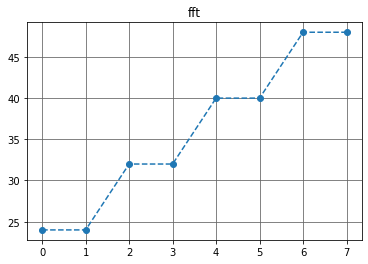

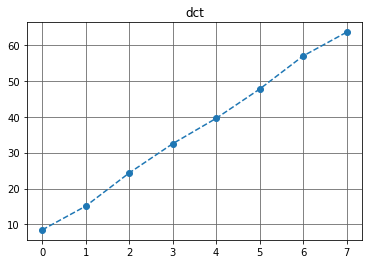

In [6]:
plt.plot(the_array_ifft, marker='o', linestyle="--")
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.title("fft")
plt.show()

plt.plot(the_array_idct, marker='o', linestyle="--")
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.title("dct")
plt.show()
    